In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

In [2]:
model = tf.saved_model.load(r"../mobilenet_320_exported/saved_model")

In [3]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    orig_h, orig_w = image.shape[:2]
    image = cv2.resize(image, (320, 320))  # Resize to match model's input size
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image, orig_h, orig_w

In [4]:
image_path = r"../../testing/gac-ge3-54-970px.jpg"
image, orig_h, orig_w = preprocess_image(image_path)
orig_img = cv2.imread(image_path)
predictions = model(image)

In [5]:
# Assuming predictions contain boxes, classes, and scores
boxes = predictions['detection_boxes'][0].numpy()
scores = predictions['detection_scores'][0].numpy()

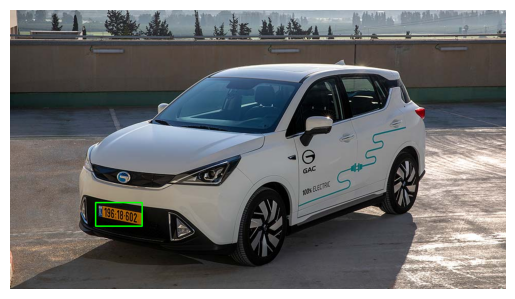

In [6]:
_, h, w, _ = image.shape
plates = []
for i in range(len(scores)):
    if scores[i] > 0.3:  # Only consider detections with high confidence
        box = boxes[i]
        # Scale the bounding box coordinates up to the original image size
        startY, startX, endY, endX = box
        startX, startY, endX, endY = (startX * orig_w, startY * orig_h, endX * orig_w, endY * orig_h)
        startX, startY, endX, endY = int(startX), int(startY), int(endX), int(endY)
        plates.append(orig_img[startY:endY, startX:endX].copy())
        cv2.rectangle(orig_img, (startX, startY), (endX, endY), (0, 255, 0), 2)

for i, plate in enumerate(plates):
    cv2.imwrite(f"plates//plate{i}.jpg", plate)
plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()